In [2]:
#read in GMTOLsong_table2024_N20_f2all_gg2_f_Phylum_rel.tsv and Nov20_25_GMTOL_metadata_all.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
#cd into /Users/samde/Library/CloudStorage/OneDrive-UniversityofCalifornia,SanDiegoHealth/Dumpy
import os
os.chdir('/Users/samde/Library/CloudStorage/OneDrive-UniversityofCalifornia,SanDiegoHealth/Dumpy')
# Read in the data files
song_table = pd.read_csv('GMTOLsong_table2024_N20_f2all_gg2_f_Phylum_rel.tsv', sep='\t', index_col=0)
metadata = pd.read_csv('Nov20_25_GMTOL_metadata_all.txt', sep='\t', index_col=0)

In [3]:
#transpose song_table and preview columns first 10
song_table_t = song_table.T
song_table_t.head(10)
#make a new column that divides d__Bacteria;p__Bacillota_A_368345 by d__Bacteria;p__Pseudomonadota 
song_table_t['Bacillota_A_to_Pseudomonadota'] = song_table_t['d__Bacteria;p__Bacillota_A_368345'] / song_table_t['d__Bacteria;p__Pseudomonadota']


In [18]:
#also take the log of Bacillota and divide by log of Pseudomonadota
song_table_t['log_Bacillota_A_to_Pseudomonadota'] = np.log10(song_table_t['d__Bacteria;p__Bacillota_A_368345']) / np.log10(song_table_t['d__Bacteria;p__Pseudomonadota']
                                                                                                                           )
#and now merge filtered_metadata with song_table_t['log_Bacillota_A_to_Pseudomonadota'] on index
merged_data2 = filtered_df.merge(song_table_t['log_Bacillota_A_to_Pseudomonadota'], left_index=True, right_index=True)

/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
#now try removing all 0s from Bacillota_A_to_Pseudomonadota filtered_data3
filtered_df4 = filtered_df3[filtered_df3['Bacillota_A_to_Pseudomonadota'] != 0]

In [6]:
#merge metadata with song_table_t['Bacillota_A_to_Pseudomonadota'] on index
merged_data = metadata.merge(song_table_t['Bacillota_A_to_Pseudomonadota'], left_index=True, right_index=True)
#preview merged_data
merged_data

,Phylum,Class,Order,Family,Genus,Species,DietSimp,DietSpec,Diet_2,DietClassSimp,...,taxid,code,Aug8order,Chordata,Class_w_snakes,Class_snake_env,Class_snake_env_Invert,Class_snake_env_InvertVert,ClassFinal,Bacillota_A_to_Pseudomonadota
C6,Cnidaria,Anthozoa,Scleractinia,Acroporidae,Acropora,Acropora_hyacinthus,coral,coral,animal,Anthozoacoral,...,55974.0,1.0,33,Invertebrate,Anthozoa,Anthozoa,Invertebrate,Invertebrate,Anthozoa,0.002229
C17,Cnidaria,Anthozoa,Scleractinia,Acroporidae,Acropora,Acropora_hyacinthus,coral,coral,animal,Anthozoacoral,...,55974.0,1.0,34,Invertebrate,Anthozoa,Anthozoa,Invertebrate,Invertebrate,Anthozoa,0.000000
C27,Cnidaria,Anthozoa,Scleractinia,Acroporidae,Acropora,Acropora_hyacinthus,coral,coral,animal,Anthozoacoral,...,55974.0,1.0,35,Invertebrate,Anthozoa,Anthozoa,Invertebrate,Invertebrate,Anthozoa,0.000314
C2,Cnidaria,Anthozoa,Scleractinia,Pocilloporidae,Pocillopora,Pocillopora_elegans,coral,coral,animal,Anthozoacoral,...,490832.0,1.0,898,Invertebrate,Anthozoa,Anthozoa,Invertebrate,Invertebrate,Anthozoa,0.000000
C3,Cnidaria,Anthozoa,Scleractinia,Pocilloporidae,Pocillopora,Pocillopora_elegans,coral,coral,animal,Anthozoacoral,...,490832.0,1.0,899,Invertebrate,Anthozoa,Anthozoa,Invertebrate,Invertebrate,Anthozoa,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13743285,Chordata,Reptilia,squamata,viperidae,trimeresurus,trimeresurus_flavomaculatus,Carnivore,Carnivore,NaN,ReptiliaCarnivore,...,109780.0,1.0,12946,Vertebrate,snake,snake,snake,snake,Reptilia,0.005700
13743286,Chordata,Reptilia,squamata,viperidae,trimeresurus,trimeresurus_flavomaculatus,Carnivore,Carnivore,NaN,ReptiliaCarnivore,...,109780.0,1.0,12947,Vertebrate,snake,snake,snake,snake,Reptilia,0.000000
13743292,Chordata,Reptilia,squamata,viperidae,trimeresurus,trimeresurus_flavomaculatus,Carnivore,Carnivore,NaN,ReptiliaCarnivore,...,109780.0,1.0,12948,Vertebrate,snake,snake,snake,snake,Reptilia,0.002970
13743293,Chordata,Reptilia,squamata,viperidae,trimeresurus,trimeresurus_flavomaculatus,Carnivore,Carnivore,NaN,ReptiliaCarnivore,...,109780.0,1.0,12949,Vertebrate,snake,snake,snake,snake,Reptilia,0.000000


In [7]:
#now instead do the log ratios to better visualize

df=merged_data.copy()
order = (
    df.groupby("ClassFinal")["Bacillota_A_to_Pseudomonadota"]
      .mean()
      .sort_values(ascending=False)
      .index
)

plt.figure(figsize=(12, 6))

sns.barplot(
    data=df,
    x="ClassFinal",
    y="Bacillota_A_to_Pseudomonadota",
    order=order,
    estimator="mean",
    errorbar="se",
    alpha=0.7
)

sns.stripplot(
    data=df,
    x="ClassFinal",
    y="Bacillota_A_to_Pseudomonadota",
    order=order,
    color="black",
    jitter=True,
    size=3,
    alpha=0.6
)

plt.yscale("log")          # ← log-scale on y-axis
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to 

In [11]:
order = (
    df.groupby("ClassFinal")["Bacillota_A_to_Pseudomonadota"]
      .mean()
      .sort_values(ascending=False)
      .index
)

In [12]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

In [18]:
sns.barplot(
    data=df,
    x="ClassFinal",
    y="Bacillota_A_to_Pseudomonadota",
    order=order,
    errorbar="se",
    alpha=0.7
)

/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


<Axes: xlabel='ClassFinal', ylabel='Bacillota_A_to_Pseudomonadota'>

In [19]:
sns.stripplot(
    data=df,
    x="ClassFinal",
    y="Bacillota_A_to_Pseudomonadota",
    order=order,
    color="black",
    jitter=True,
    size=3,
    alpha=0.6
)

/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/samde/miniconda3/envs/qiime2-am

<Axes: xlabel='ClassFinal', ylabel='Bacillota_A_to_Pseudomonadota'>

<Figure size 1200x600 with 0 Axes>

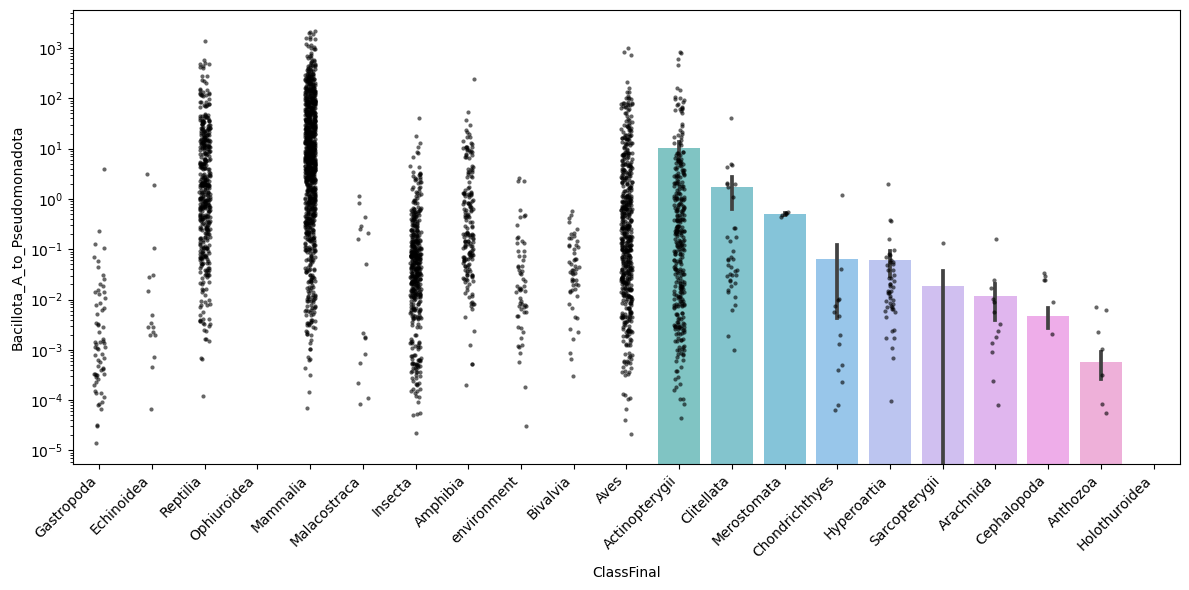

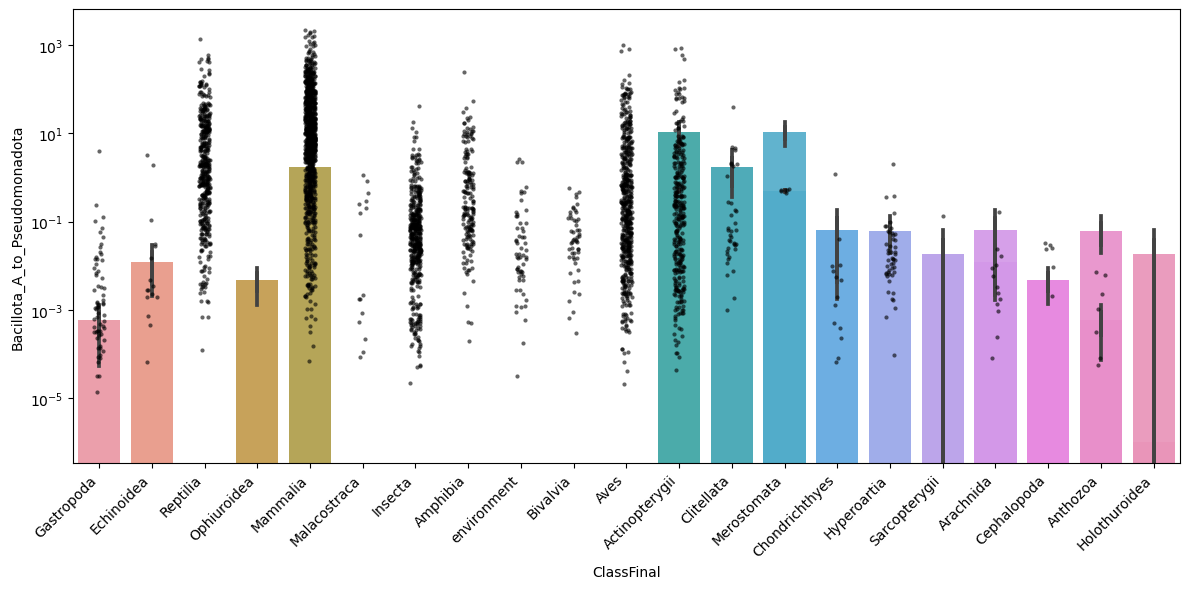

In [21]:
plt.yscale("log")          # ← log-scale on y-axis
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
%matplotlib inline
plt.show()

In [8]:
#now I want to remove Holothuroidea, Anthozoa, Sarcopterygii, Ophiuroidea, Merostomata, and Cephalopoda from the plot
filtered_df = df[~df["ClassFinal"].isin(["Holothuroidea", "Anthozoa", "Sarcopterygii", "Ophiuroidea", "Merostomata", "Cephalopoda"])]

/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to 

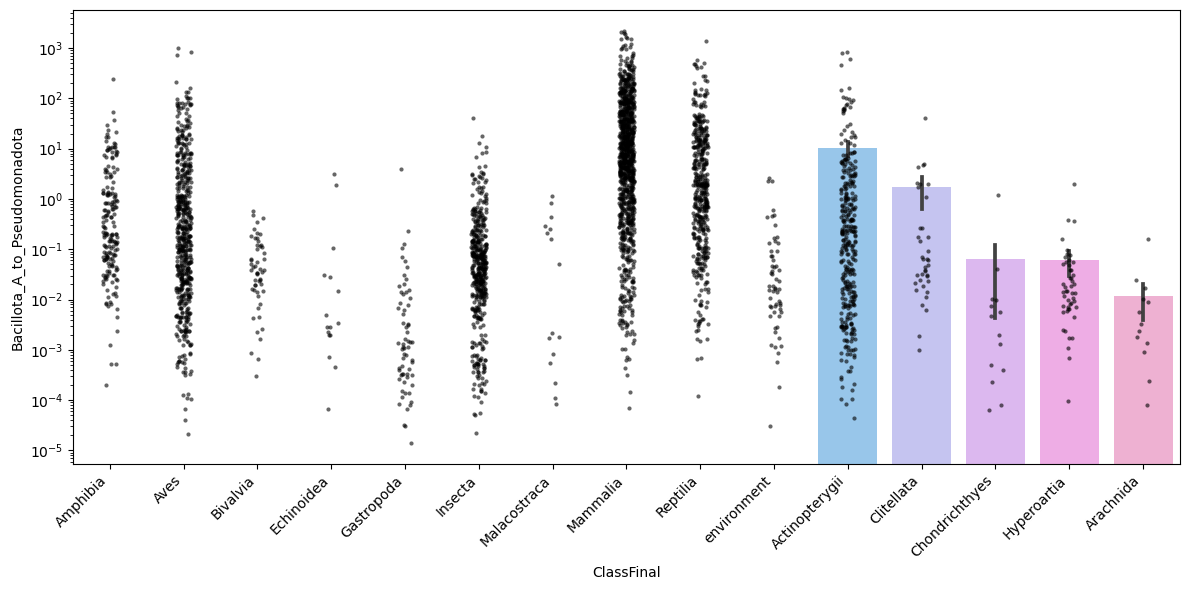

In [27]:
#now plot again
order = (
    filtered_df.groupby("ClassFinal")["Bacillota_A_to_Pseudomonadota"]
      .mean()
      .sort_values(ascending=False)
      .index
)
df["ClassFinal"] = pd.Categorical(df["ClassFinal"], categories=order, ordered=True)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=filtered_df,
    x="ClassFinal",
    y="Bacillota_A_to_Pseudomonadota",
    order=order,
    errorbar="se",
    alpha=0.7
)

sns.stripplot(
    data=filtered_df,
    x="ClassFinal",
    y="Bacillota_A_to_Pseudomonadota",
    order=order,
    color="black",
    jitter=True,
    size=3,
    alpha=0.6
)
plt.yscale("log")          # ← log-scale on y-axis
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
%matplotlib inline
plt.show()

In [26]:
order

Index(['Amphibia', 'Aves', 'Bivalvia', 'Echinoidea', 'Gastropoda', 'Insecta',
       'Malacostraca', 'Mammalia', 'Reptilia', 'environment', 'Actinopterygii',
       'Clitellata', 'Chondrichthyes', 'Hyperoartia', 'Arachnida'],
      dtype='object', name='ClassFinal')

In [9]:
#convert Bacillota_A_to_Pseudomonadota to numpy array and then calculate mean for each ClassFinal 
grouped_means = filtered_df.groupby("ClassFinal")["Bacillota_A_to_Pseudomonadota"].mean().to_dict()
grouped_means


{'Actinopterygii': 10.516235558579112,
 'Amphibia': inf,
 'Arachnida': 0.011969022673946492,
 'Aves': inf,
 'Bivalvia': inf,
 'Chondrichthyes': 0.06330265989231837,
 'Clitellata': 1.7084927932849336,
 'Echinoidea': inf,
 'Gastropoda': inf,
 'Hyperoartia': 0.06074776786533385,
 'Insecta': inf,
 'Malacostraca': inf,
 'Mammalia': inf,
 'Reptilia': inf,
 'environment': inf}

In [36]:
#List out Aves Bacillota_A_to_Pseudomonadota values and then do same for Chondrichthyes
aves_values = filtered_df[filtered_df["ClassFinal"] == "Aves"]["Bacillota_A_to_Pseudomonadota"].values
chondrichthyes_values = filtered_df[filtered_df["ClassFinal"] == "Chondrichthyes"]["Bacillota_A_to_Pseudomonadota"].values
aves_values, chondrichthyes_values

(array([           nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
        0.00000000e+00,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan, 0.00000000e+00,            nan,
        2.38429251e+01, 8.45162849e+00, 3.29580546e-01, 2.84443443e-01,
        5.29607283e-01, 8.52216057e-01, 7.41758244e-02, 5.34253557e+00,
        1.36765558e+01, 8.36632034e+00, 8.63666016e-01, 7.43834528e-01,
        1.03103631e-01, 3.65281171e-01, 1.66334444e-03, 2.42597623e-03,
        3.56231197e-04, 3.87029336e-04, 1.04193914e+01, 1.23094834e+01,
        8.00871737e+00, 6.80568379e+00, 2.97031812e+01, 3.21823022e+00,
        3.49638946e-01, 3.09255531e-01, 1.09384298e+00, 9.85196376e-01,
        3.07731792e-02, 2.76491282e-01, 7.53018659e-01, 2.41609722e+00,
        8.89211763e-02, 9.51978178e-03, 1.43166192e-01, 2.792763

/var/folders/l5/bc59br8961516ssfthb0x16h0000gn/T/ipykernel_98350/2245539330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Bacillota_A_to_Pseudomonadota"] = pd.to_numeric(filtered_df["Bacillota_A_to_Pseudomonadota"], errors='coerce')


In [48]:
df


,Phylum,Class,Order,Family,Genus,Species,DietSimp,DietSpec,Diet_2,DietClassSimp,...,code,Aug8order,Chordata,Class_w_snakes,Class_snake_env,Class_snake_env_Invert,Class_snake_env_InvertVert,ClassFinal,Bacillota_A_to_Pseudomonadota,_logvalue
C6,Cnidaria,Anthozoa,Scleractinia,Acroporidae,Acropora,Acropora_hyacinthus,coral,coral,animal,Anthozoacoral,...,1.0,33,Invertebrate,Anthozoa,Anthozoa,Invertebrate,Invertebrate,NaN,0.002229,0.002230
C17,Cnidaria,Anthozoa,Scleractinia,Acroporidae,Acropora,Acropora_hyacinthus,coral,coral,animal,Anthozoacoral,...,1.0,34,Invertebrate,Anthozoa,Anthozoa,Invertebrate,Invertebrate,NaN,0.000000,0.000001
C27,Cnidaria,Anthozoa,Scleractinia,Acroporidae,Acropora,Acropora_hyacinthus,coral,coral,animal,Anthozoacoral,...,1.0,35,Invertebrate,Anthozoa,Anthozoa,Invertebrate,Invertebrate,NaN,0.000314,0.000315
C2,Cnidaria,Anthozoa,Scleractinia,Pocilloporidae,Pocillopora,Pocillopora_elegans,coral,coral,animal,Anthozoacoral,...,1.0,898,Invertebrate,Anthozoa,Anthozoa,Invertebrate,Invertebrate,NaN,0.000000,0.000001
C3,Cnidaria,Anthozoa,Scleractinia,Pocilloporidae,Pocillopora,Pocillopora_elegans,coral,coral,animal,Anthozoacoral,...,1.0,899,Invertebrate,Anthozoa,Anthozoa,Invertebrate,Invertebrate,NaN,0.000000,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13743285,Chordata,Reptilia,squamata,viperidae,trimeresurus,trimeresurus_flavomaculatus,Carnivore,Carnivore,NaN,ReptiliaCarnivore,...,1.0,12946,Vertebrate,snake,snake,snake,snake,Reptilia,0.005700,0.005701
13743286,Chordata,Reptilia,squamata,viperidae,trimeresurus,trimeresurus_flavomaculatus,Carnivore,Carnivore,NaN,ReptiliaCarnivore,...,1.0,12947,Vertebrate,snake,snake,snake,snake,Reptilia,0.000000,0.000001
13743292,Chordata,Reptilia,squamata,viperidae,trimeresurus,trimeresurus_flavomaculatus,Carnivore,Carnivore,NaN,ReptiliaCarnivore,...,1.0,12948,Vertebrate,snake,snake,snake,snake,Reptilia,0.002970,0.002971
13743293,Chordata,Reptilia,squamata,viperidae,trimeresurus,trimeresurus_flavomaculatus,Carnivore,Carnivore,NaN,ReptiliaCarnivore,...,1.0,12949,Vertebrate,snake,snake,snake,snake,Reptilia,0.000000,0.000001


In [10]:
#get rid of rows where ClassFinal is NaN
filtered_df2 = filtered_df.dropna(subset=["ClassFinal"])

In [11]:
#now try to calculate means
filtered_means = filtered_df2.groupby("ClassFinal")["Bacillota_A_to_Pseudomonadota"].mean()
filtered_means

ClassFinal
Actinopterygii    10.516236
Amphibia                inf
Arachnida          0.011969
Aves                    inf
Bivalvia                inf
Chondrichthyes     0.063303
Clitellata         1.708493
Echinoidea              inf
Gastropoda              inf
Hyperoartia        0.060748
Insecta                 inf
Malacostraca            inf
Mammalia                inf
Reptilia                inf
environment             inf
Name: Bacillota_A_to_Pseudomonadota, dtype: float64

In [12]:
#save filttered_df2 to tsv
filtered_df2.to_csv('filtered_GMTOL_BacillotaA_to_Pseudomonadota.tsv', sep='\t')

In [13]:
#remove all rows with inf values in Bacillota_A_to_Pseudomonadota and _logvalues 
filtered_df3 = filtered_df2.replace([np.inf, -np.inf], np.nan).dropna(subset=["Bacillota_A_to_Pseudomonadota"])
#same for column -logvalues




In [51]:
#now calculate means
filtered_means2 = filtered_df3.groupby("ClassFinal")["Bacillota_A_to_Pseudomonadota"].mean()
filtered_means2


/var/folders/l5/bc59br8961516ssfthb0x16h0000gn/T/ipykernel_98350/3142360402.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_means2 = filtered_df3.groupby("ClassFinal")["Bacillota_A_to_Pseudomonadota"].mean()


ClassFinal
Amphibia           3.562928
Aves               9.724260
Bivalvia           0.064762
Echinoidea         0.265815
Gastropoda         0.040244
Insecta            0.254352
Malacostraca       0.093330
Mammalia          63.490027
Reptilia          22.029996
environment        0.143938
Actinopterygii    10.516236
Clitellata         1.708493
Chondrichthyes     0.063303
Hyperoartia        0.060748
Arachnida          0.011969
Name: Bacillota_A_to_Pseudomonadota, dtype: float64

/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


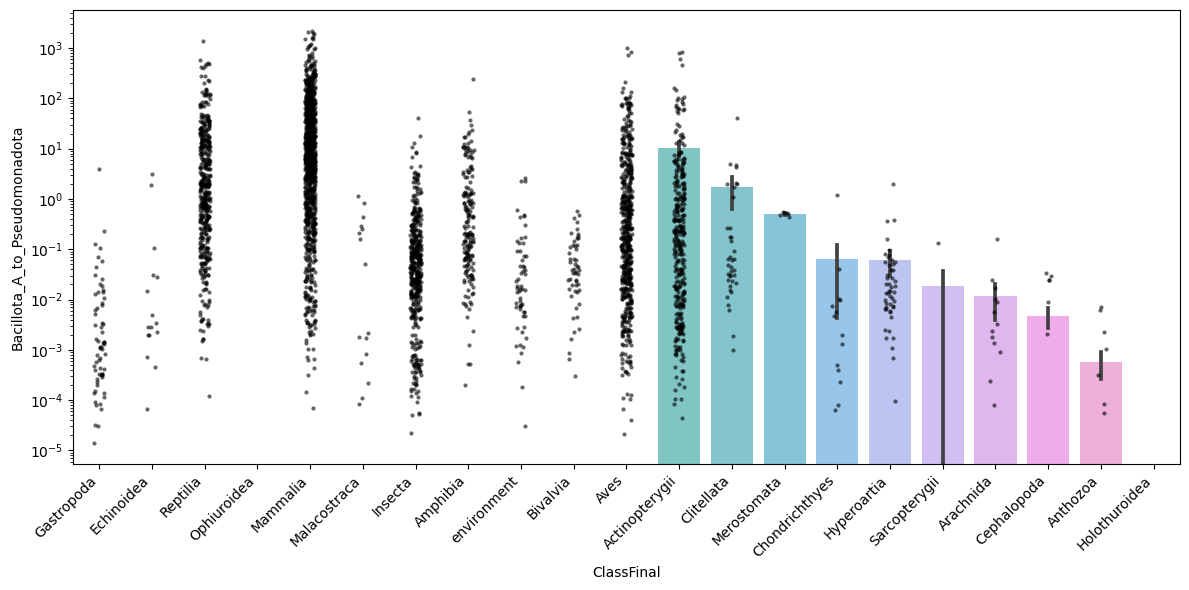

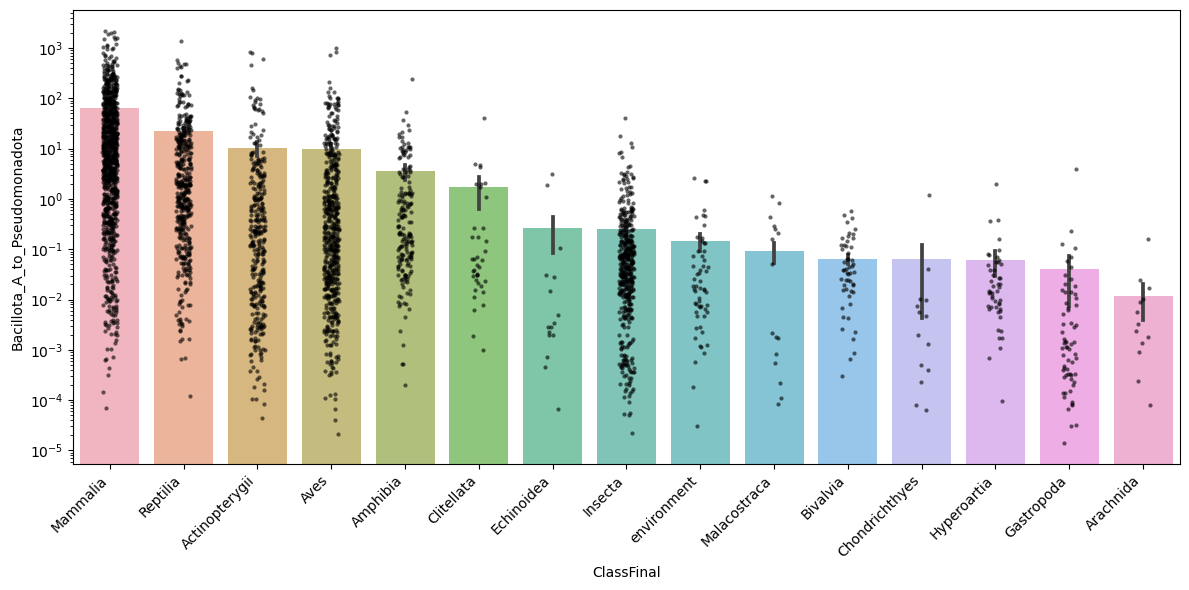

In [14]:
#now plot again and transform log
order = (
    filtered_df3.groupby("ClassFinal")["Bacillota_A_to_Pseudomonadota"]
      .mean()
      .sort_values(ascending=False)
      .index
)
df["ClassFinal"] = pd.Categorical(df["ClassFinal"], categories=order, ordered=True)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=filtered_df3,
    x="ClassFinal",
    y="Bacillota_A_to_Pseudomonadota",
    order=order,
    errorbar="se",
    alpha=0.7
)
sns.stripplot(
    data=filtered_df3,
    x="ClassFinal",
    y="Bacillota_A_to_Pseudomonadota",
    order=order,
    color="black",
    jitter=True,
    size=3,
    alpha=0.6
)
plt.yscale("log")          # ← log-scale on y-axis
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
%matplotlib inline
plt.show()

/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/User

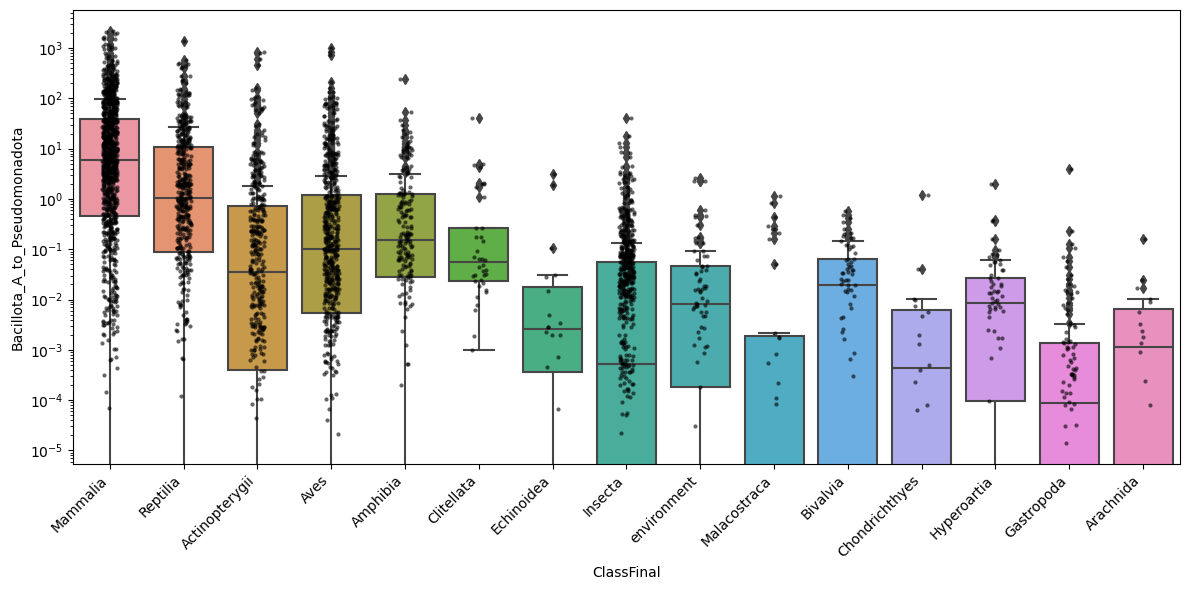

In [54]:
#now turn them into boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=filtered_df3,
    x="ClassFinal",
    y="Bacillota_A_to_Pseudomonadota",
    order=order
)
sns.stripplot(
    data=filtered_df3,
    x="ClassFinal",
    y="Bacillota_A_to_Pseudomonadota",
    order=order,
    color="black",
    jitter=True,
    size=3,
    alpha=0.6
)
plt.yscale("log")          # ← log-scale on y-axis
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
%matplotlib inline
plt.show()

In [15]:
#now order the medians
order_median = (
    filtered_df3.groupby("ClassFinal")["Bacillota_A_to_Pseudomonadota"]
      .median()
      .sort_values(ascending=False)
      .index
)

/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/User

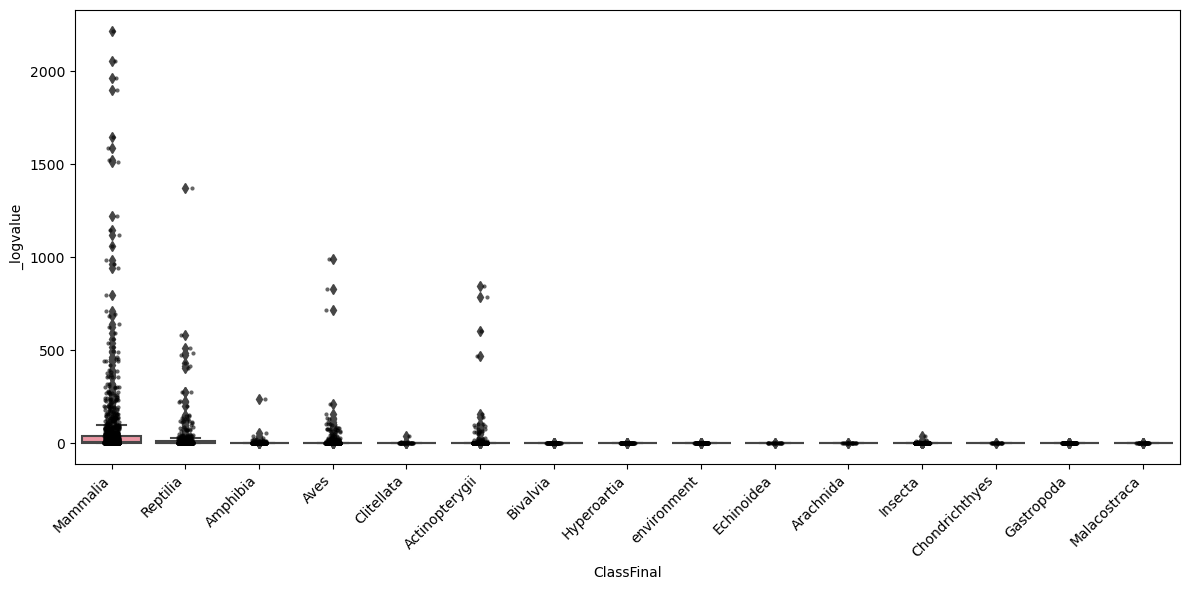

In [74]:
#plot 
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=filtered_df3,
    x="ClassFinal",
    y="_logvalue",
    order=order_median
)
sns.stripplot(
    data=filtered_df3,
    x="ClassFinal",
    y="_logvalue",
    order=order_median,
    color="black",
    jitter=True,
    size=3,
    alpha=0.6
)
#plt.yscale("log")          # ← log-scale on y-axis
plt.xticks(rotation=45, ha="right")
#make y axis start from negative 0.001
plt.tight_layout()
%matplotlib inline
plt.show()

In [16]:
#now add 10-6 to all values in Bacillota_A_to_Pseudomonadota to avoid zeroes
filtered_df3['Bacillota_A_to_Pseudomonadota_plus'] = filtered_df3['Bacillota_A_to_Pseudomonadota'] + 1e-6

/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/User

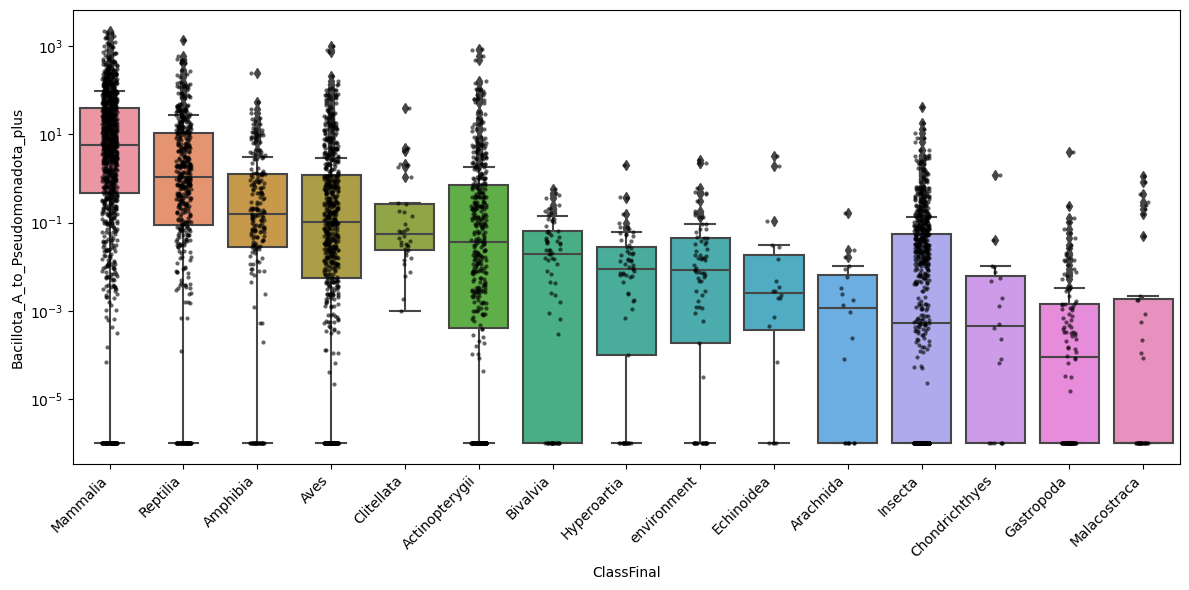

In [69]:
#plot again
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=filtered_df3,
    x="ClassFinal",
    y="Bacillota_A_to_Pseudomonadota_plus",
    order=order_median
)
sns.stripplot(
    data=filtered_df3,
    x="ClassFinal",
    y="Bacillota_A_to_Pseudomonadota_plus",
    order=order_median,
    color="black",
    jitter=True,
    size=3,
    alpha=0.6
)
plt.yscale("log")          # ← log-scale on y-axis
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
%matplotlib inline
plt.show()

/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/User

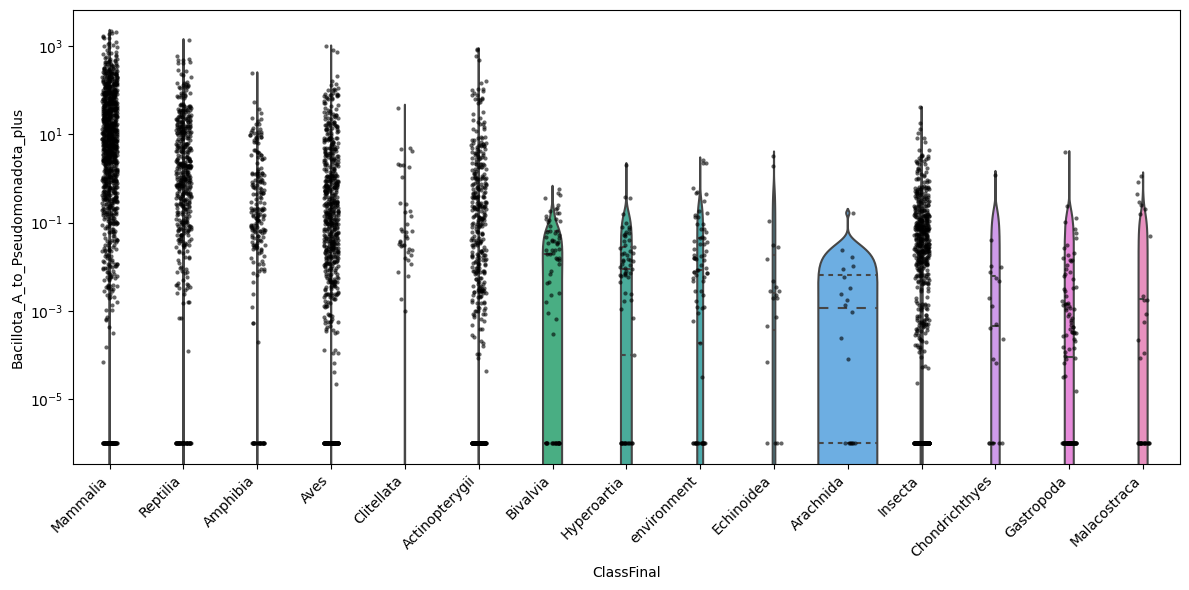

In [70]:
#now try a violin plot instead
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=filtered_df3,
    x="ClassFinal",
    y="Bacillota_A_to_Pseudomonadota_plus",
    order=order_median,
    inner="quartile"
)
sns.stripplot(
    data=filtered_df3,
    x="ClassFinal",
    y="Bacillota_A_to_Pseudomonadota_plus",
    order=order_median,
    color="black",
    jitter=True,
    size=3,
    alpha=0.6
)
plt.yscale("log")          # ← log-scale on y-axis
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
%matplotlib inline
plt.show()

/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/User

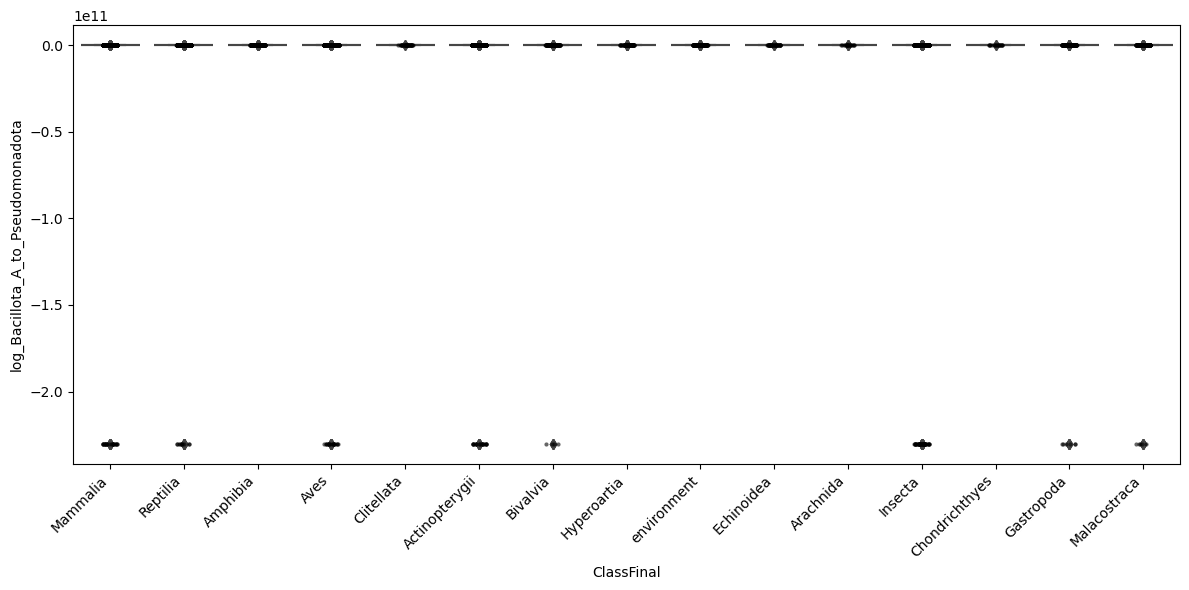

In [81]:
#ok now plot log_Bacillota_A_to_Pseudomonadota instead and do boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=merged_data2,
    x="ClassFinal",
    y="log_Bacillota_A_to_Pseudomonadota",
    order=order_median
)
sns.stripplot(
    data=merged_data2,
    x="ClassFinal",
    y="log_Bacillota_A_to_Pseudomonadota",
    order=order_median,
    color="black",
    jitter=True,
    size=3,
    alpha=0.6
)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
%matplotlib inline
plt.show()

/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/samde/miniconda3/envs/qiime2-amplicon-2025.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


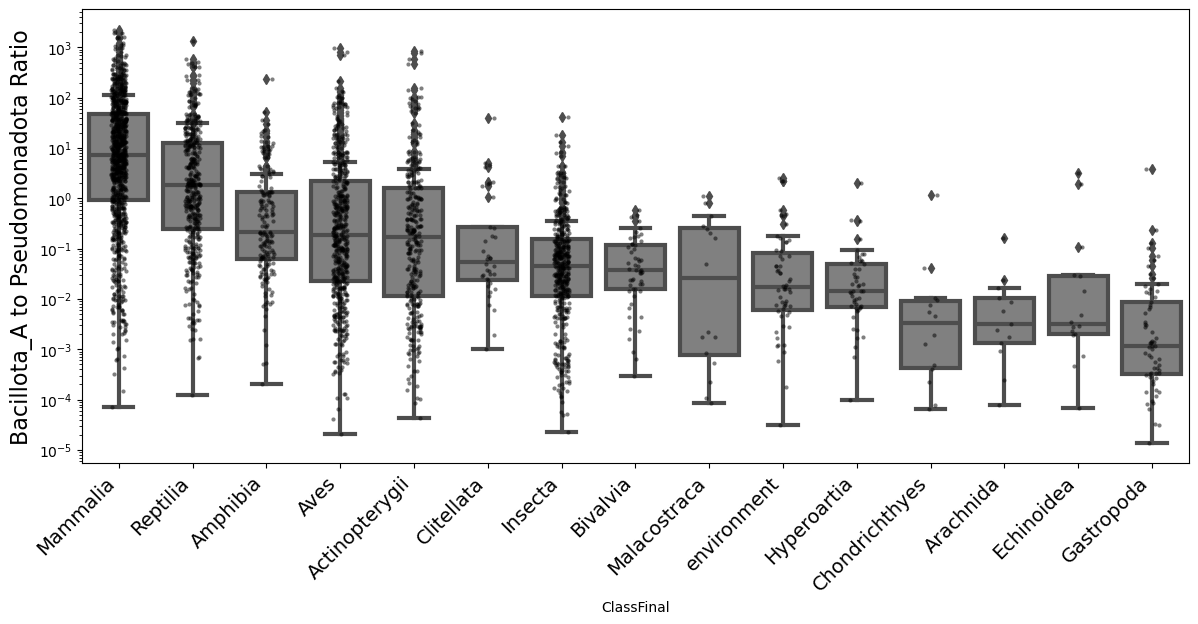

In [30]:
#now plot filtered_df4  boxplot of Bacillota_A_to_Pseudomonadota
#order by median again
order_median = (
    filtered_df4.groupby("ClassFinal")["Bacillota_A_to_Pseudomonadota"]
      .median()
      .sort_values(ascending=False)
      .index
)
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=filtered_df4,
    x="ClassFinal",
    y="Bacillota_A_to_Pseudomonadota",
    order=order_median,
    color="gray",
    linewidth=3
)
plt.yscale("log")          # ← log-scale on y-axis
sns.stripplot(
    data=filtered_df4,
    x="ClassFinal",
    y="Bacillota_A_to_Pseudomonadota",
    order=order_median,
    color="black",
    jitter=True,
    size=3,
    alpha=0.5
)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.xticks(fontsize=14)
plt.ylabel('Bacillota_A to Pseudomonadota Ratio', fontsize=16)
#move X axis labels over to right
%matplotlib inline
plt.savefig('GMTOL_BacillotaA_to_Pseudomonadota_boxplot_filtered_nozeros.svg')
plt.show()
#save as svg


In [88]:
#print out medians
medians_final = filtered_df4.groupby("ClassFinal")["Bacillota_A_to_Pseudomonadota"].median()
medians_final

/var/folders/l5/bc59br8961516ssfthb0x16h0000gn/T/ipykernel_98350/3130790056.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians_final = filtered_df4.groupby("ClassFinal")["Bacillota_A_to_Pseudomonadota"].median()


ClassFinal
Amphibia          0.214592
Aves              0.184255
Bivalvia          0.038120
Echinoidea        0.003173
Gastropoda        0.001153
Insecta           0.045030
Malacostraca      0.026376
Mammalia          7.424767
Reptilia          1.834794
environment       0.017037
Actinopterygii    0.167902
Clitellata        0.055333
Chondrichthyes    0.003299
Hyperoartia       0.014475
Arachnida         0.003249
Name: Bacillota_A_to_Pseudomonadota, dtype: float64

In [1]:
#replot again same code
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=filtered_df4,
    x="ClassFinal",
    y="Bacillota_A_to_Pseudomonadota",
    order=order_median,
    color="lightblue"
)
plt.yscale("log")          # ← log-scale on y-axis
sns.stripplot(
    data=filtered_df4,
    x="ClassFinal",
    y="Bacillota_A_to_Pseudomonadota",
    order=order_median,
    color="black",
    jitter=True,
    size=3,
    alpha=0.5
)
plt.xticks(rotation=45, ha="right") 
plt.tight_layout()
%matplotlib inline
plt.show()

NameError: name 'plt' is not defined

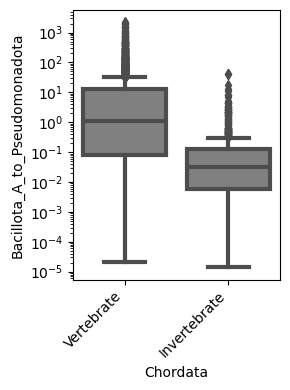

In [51]:
#now make the same boxplot but group the data by the column Chordata
order_median_chordata = (
     filtered_df4.groupby("Chordata")["Bacillota_A_to_Pseudomonadota"]
    .median()
    .sort_values(ascending=False)
    .index
        )
plt.figure(figsize=(3, 4))
sns.boxplot(
    data=filtered_df4,
    x="Chordata",
    y="Bacillota_A_to_Pseudomonadota",
    order=order_median_chordata,
    color="gray",
    linewidth=3,
)
plt.yscale("log")          # ← log-scale on y-axis

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
%matplotlib inline
plt.savefig('GMTOL_BacillotaA_to_Pseudomonadota_boxplot_filtered_nozeros_Chordata.svg')
plt.show()



In [52]:
#now do a Kruskal-Wallis test on filtered_df4 grouped by Chordata
from scipy.stats import kruskal
groups = [group["Bacillota_A_to_Pseudomonadota"].values for name, group in filtered_df4.groupby("Chordata")]

In [53]:
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis test statistic: {stat}, p-value: {p}")

Kruskal-Wallis test statistic: 582.6119499526735, p-value: 1.0137494577974962e-128
